**Product Sale Data Analyst Project**

In [1]:
import pandas as pd 
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Project/Real problem/Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Merge the sub dataset

In [4]:
all_month_data = pd.DataFrame()

In [6]:
files=[file for file in os.listdir("/content/drive/MyDrive/Project/Real problem/Sales_Data/")]
for file in files:
  df=pd.read_csv("/content/drive/MyDrive/Project/Real problem/Sales_Data/" + file)
  all_month_data=pd.concat([all_month_data,df])


In [7]:
all_month_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
5,259363,AAA Batteries (4-pack),1,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001"
6,259364,Wired Headphones,1,11.99,10/29/19 11:02,"874 North St, Los Angeles, CA 90001"
7,259365,Lightning Charging Cable,1,14.95,10/29/19 11:19,"127 12th St, Los Angeles, CA 90001"
8,259366,Apple Airpods Headphones,1,150.0,10/20/19 11:52,"955 9th St, Los Angeles, CA 90001"
9,259367,Apple Airpods Headphones,1,150.0,10/16/19 16:19,"742 14th St, San Francisco, CA 94016"


In [8]:
all_month_data.to_csv("/content/drive/MyDrive/Project/Real problem/products_data.csv", index= False)

In [9]:
products_data = pd.read_csv("/content/drive/MyDrive/Project/Real problem/products_data.csv")
products_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


# Clean the data

In [10]:
#Find all the NaN value
nan_df = products_data[products_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185230,NaN,NaN,NaN,NaN,NaN,NaN
185379,NaN,NaN,NaN,NaN,NaN,NaN
185527,NaN,NaN,NaN,NaN,NaN,NaN
185913,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Drop the NaN rows
products_data = products_data.dropna(how="all")

In [12]:
# Find rows with Or value in Order Date columns
temp_df = products_data[products_data["Order Date"].str[0:2] == "Or"]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
521,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
833,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2180,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2388,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4248,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183747,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185675,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185791,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185806,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
# Remove the rows in that Order Date column contains Or
products_data = products_data[products_data["Order Date"].str[0:2] != "Or"]

# Add month and sale columns to dataset

In [14]:
products_data["Month"] = products_data["Order Date"].str[0:2]
products_data["Month"] = products_data["Month"].astype("int32")
products_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10
...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4


In [15]:
products_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [16]:
# Change type of columns
products_data["Quantity Ordered"] = products_data["Quantity Ordered"].astype("int32")
products_data["Price Each"] = products_data["Price Each"].astype("float")

In [17]:
products_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [18]:
products_data["Sale"] = products_data["Quantity Ordered"] * products_data["Price Each"]
products_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99
...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,600.00
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,3.84
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,5.98
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,3.84


In [ ]:
products_data.to_csv("/content/drive/MyDrive/Project/Real problem/products_data.csv", index= False)

# Question 1: Best Month for sale?





In [21]:
data_group_month = products_data.groupby(["Month"]).sum()
data_group_month.sort_values(by = ["Sale"], ascending = False)

,Quantity Ordered,Price Each,Sale
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


Text(0.5, 1.0, 'Products Sale By Month')

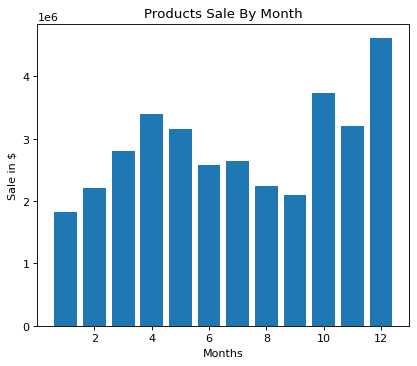

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5), dpi=80)
month=range(1,13)
plt.bar(month, data_group_month["Sale"])
plt.xlabel("Months")
plt.ylabel("Sale in $")
plt.title("Products Sale By Month")

# Question 2: What city have highest sale ?





In [31]:
def get_city(x):
  return x.split(",")[1]

def get_region(x):
  return x.split(",")[2].split(" ")[1]

products_data["City"] = products_data["Purchase Address"].apply(lambda x: get_city(x)+" ("+get_region(x)+")")
products_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY)
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,3.84,Austin (TX)
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,5.98,San Francisco (CA)
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,3.84,Portland (OR)


In [32]:
city_group_sales = products_data.groupby("City").sum()
city_group_sales.sort_values("Sale")

,Quantity Ordered,Price Each,Month,Sale
City,,,,
Portland (ME),2750,447189.25,17144,449758.27
Austin (TX),11153,1809873.61,69829,1819581.75
Portland (OR),11303,1860558.22,70621,1870732.34
Seattle (WA),16553,2733296.01,104941,2747755.48
Dallas (TX),16730,2752627.82,104620,2767975.40
Atlanta (GA),16602,2779908.20,104794,2795498.58
Boston (MA),22528,3637409.77,141112,3661642.01
New York City (NY),27932,4635370.83,175741,4664317.43
Los Angeles (CA),33289,5421435.23,208325,5452570.80


Text(0.5, 1.0, 'Sales in different city')

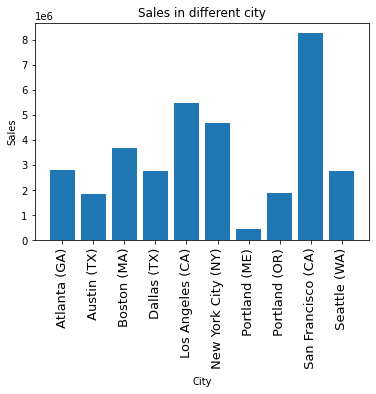

In [34]:
cities=[city for city,df in products_data.groupby("City")]
plt.bar(cities,city_group_sales["Sale"])
plt.xticks(cities,rotation="vertical",size=13)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales in different city")

# Question 3: What products are most ordered ? Relation betweeen price and ordered quantity

In [39]:
# Product ordered quantity
most_sold = products_data.groupby("Product").sum()
quantity_ordered = most_sold["Quantity Ordered"]
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [38]:
# Product price
price = products_data.groupby("Product").mean()["Price Each"]
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Text(0.5, 1.0, 'Most ordered products')

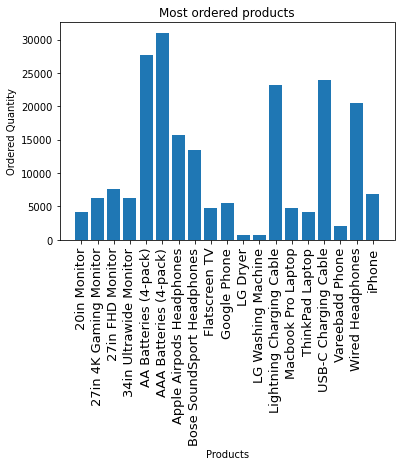

In [41]:
product = [product for product,df in products_data.groupby("Product")]
plt.bar(product,quantity_ordered)
plt.xticks(product,rotation="vertical",size=13)
plt.xlabel("Products")
plt.ylabel("Ordered Quantity")
plt.title("Most ordered products")

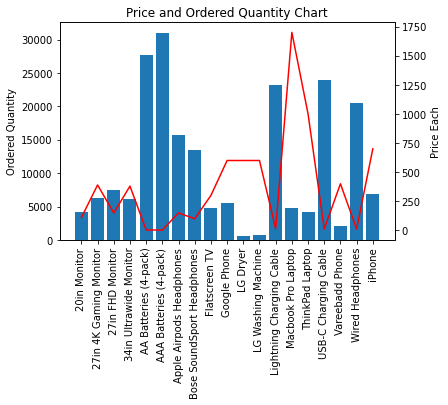

In [ ]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(product,quantity_ordered)
ax2.plot(product,price,color="red")

ax1.set_ylabel("Ordered Quantity")
ax2.set_ylabel("Price Each")
ax1.set_xticklabels(product,rotation="vertical")
plt.title("Price and Ordered Quantity Chart")
plt.show()